# 1. Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import nltk, re, string, collections
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords
from wordcloud import WordCloud, ImageColorGenerator 
from PIL import Image

In [2]:
df = pd.read_csv("cognit_papers_unique.csv")
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [3]:
df

,title,link,body,author,university
0,'What Matters' - A digital solution to support...,https://cognit.ca/en/research/project/232601,Canada's aging population and the increasing p...,"Leanne Currie, Habib Chaudhury, Lillian M Hung...","University of British Columbia, Simon Fraser U..."
1,5th Annual Toronto Area Memory Group (TAMeG) C...,https://cognit.ca/en/research/project/215195,The greater Toronto and Southern Ontario regio...,Brian T Levine,Baycrest Health Sciences
2,A Critical Comparative Analysis of Integrated ...,https://cognit.ca/en/research/project/148238,Canada is currently undergoing a period of rap...,Laura T Kadowaki,Simon Fraser University
3,A collaborative evaluation of the Iiyuu Ahtaaw...,https://cognit.ca/en/research/project/152247,The goal for this project is to evaluate a maj...,Mary E Macdonald,McGill University
4,A comprehensive account of price discriminatio...,https://cognit.ca/en/research/project/113373,This proposal provides a new perspective on a ...,Ambarish Chandra,University of Toronto
...,...,...,...,...,...
144,Using Population Based Data to Guide Fetal Alc...,https://cognit.ca/en/research/project/148734,This fellowship is a one-year partnership posi...,Deepa Singal,University of Manitoba
145,Using photovoice to capture the housing-relate...,https://cognit.ca/en/research/project/187391,"In 2016, there were 240,615 Vietnamese in Cana...",Anh P Ngo,Wilfrid Laurier University
146,VR Systems for Body Image and Body Schema ( 20...,https://cognit.ca/en/research/project/192279,Recent research in the emerging field of embod...,Diane Gromala,Simon Fraser University
147,Victorian sociability: an International Worksh...,https://cognit.ca/en/research/project/184077,VICTORIAN SOCIABILITY: AN INTERNATIONAL WORKSH...,Karen A Bourrier,University of Calgary


In [4]:
from textblob import TextBlob

#Sentiment Polarity - reanges from -1 to 1
polarit = lambda x: TextBlob(x).sentiment.polarity

In [5]:
df['polarity'] = df['body'].apply(polarit)

In [6]:
df

,title,link,body,author,university,polarity
0,'What Matters' - A digital solution to support...,https://cognit.ca/en/research/project/232601,Canada's aging population and the increasing p...,"Leanne Currie, Habib Chaudhury, Lillian M Hung...","University of British Columbia, Simon Fraser U...",0.149411
1,5th Annual Toronto Area Memory Group (TAMeG) C...,https://cognit.ca/en/research/project/215195,The greater Toronto and Southern Ontario regio...,Brian T Levine,Baycrest Health Sciences,0.047083
2,A Critical Comparative Analysis of Integrated ...,https://cognit.ca/en/research/project/148238,Canada is currently undergoing a period of rap...,Laura T Kadowaki,Simon Fraser University,0.104667
3,A collaborative evaluation of the Iiyuu Ahtaaw...,https://cognit.ca/en/research/project/152247,The goal for this project is to evaluate a maj...,Mary E Macdonald,McGill University,-0.011883
4,A comprehensive account of price discriminatio...,https://cognit.ca/en/research/project/113373,This proposal provides a new perspective on a ...,Ambarish Chandra,University of Toronto,0.008440
...,...,...,...,...,...,...
144,Using Population Based Data to Guide Fetal Alc...,https://cognit.ca/en/research/project/148734,This fellowship is a one-year partnership posi...,Deepa Singal,University of Manitoba,0.284722
145,Using photovoice to capture the housing-relate...,https://cognit.ca/en/research/project/187391,"In 2016, there were 240,615 Vietnamese in Cana...",Anh P Ngo,Wilfrid Laurier University,0.222442
146,VR Systems for Body Image and Body Schema ( 20...,https://cognit.ca/en/research/project/192279,Recent research in the emerging field of embod...,Diane Gromala,Simon Fraser University,0.158810
147,Victorian sociability: an International Worksh...,https://cognit.ca/en/research/project/184077,VICTORIAN SOCIABILITY: AN INTERNATIONAL WORKSH...,Karen A Bourrier,University of Calgary,0.080005


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16]),
 <a list of 9 Text major ticklabel objects>)

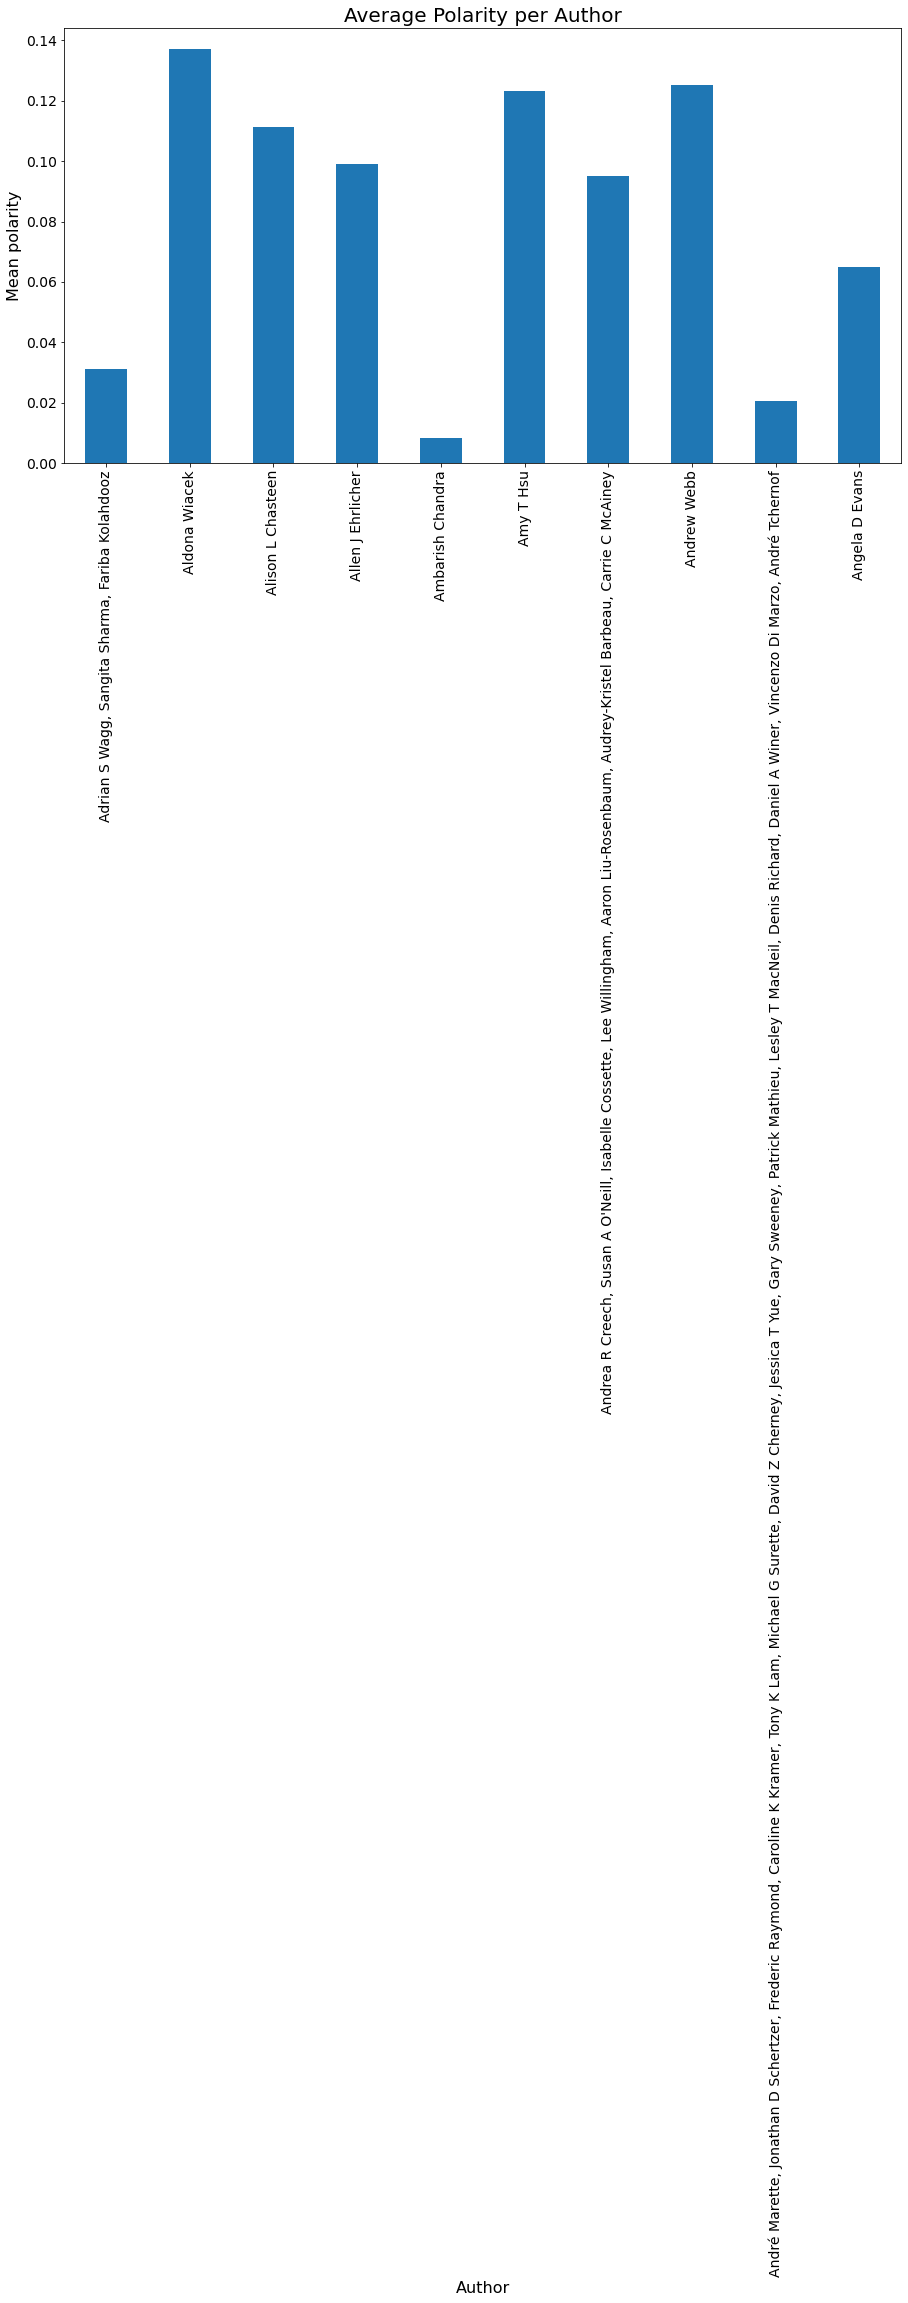

In [7]:
import matplotlib.pyplot as plt

dfg = df.groupby(['author'], sort=True)['polarity'].mean()[:10]

dfg.plot(kind='bar',figsize=(15, 8))
plt.title('Average Polarity per Author', fontsize=20)
plt.xlabel('Author', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Mean polarity', fontsize=16)
plt.yticks(fontsize=14)

In [8]:
#Looking in details for the negative article
df[df['polarity'] <0].sort_values('polarity').drop(df.columns[[1]],axis=1)

,title,body,author,university,polarity
15,COVID-19 Physical Distancing and Post-Traumati...,Physical distancing arising from COVID-19 has ...,"Suzette C Bremault-Phillips, Martin W Ferguson...","University of Alberta, University of Alberta, ...",-0.017693
51,Extending the validation and reliability testi...,In the past 20 years there has been a rapid gr...,"Heather H Keller, George A Heckman, Linda Lee,...","University of Waterloo, University of Waterloo...",-0.014848
3,A collaborative evaluation of the Iiyuu Ahtaaw...,The goal for this project is to evaluate a maj...,Mary E Macdonald,McGill University,-0.011883
18,Canadian Frailty Network - Technology Evaluati...,Canadian Frailty Network (CFN) is Canada's Net...,John Muscedere,Queen's University,-0.009524


# 2. Word Cloud

### Common data preprocessing steps on all text:

* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

In [9]:
# Apply a first round of text cleaning techniques
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [10]:
df['body'] = df.body.apply(round1)

In [11]:
df

,title,link,body,author,university,polarity
0,'What Matters' - A digital solution to support...,https://cognit.ca/en/research/project/232601,canadas aging population and the increasing pr...,"Leanne Currie, Habib Chaudhury, Lillian M Hung...","University of British Columbia, Simon Fraser U...",0.149411
1,5th Annual Toronto Area Memory Group (TAMeG) C...,https://cognit.ca/en/research/project/215195,the greater toronto and southern ontario regio...,Brian T Levine,Baycrest Health Sciences,0.047083
2,A Critical Comparative Analysis of Integrated ...,https://cognit.ca/en/research/project/148238,canada is currently undergoing a period of rap...,Laura T Kadowaki,Simon Fraser University,0.104667
3,A collaborative evaluation of the Iiyuu Ahtaaw...,https://cognit.ca/en/research/project/152247,the goal for this project is to evaluate a maj...,Mary E Macdonald,McGill University,-0.011883
4,A comprehensive account of price discriminatio...,https://cognit.ca/en/research/project/113373,this proposal provides a new perspective on a ...,Ambarish Chandra,University of Toronto,0.008440
...,...,...,...,...,...,...
144,Using Population Based Data to Guide Fetal Alc...,https://cognit.ca/en/research/project/148734,this fellowship is a oneyear partnership posit...,Deepa Singal,University of Manitoba,0.284722
145,Using photovoice to capture the housing-relate...,https://cognit.ca/en/research/project/187391,in there were vietnamese in canada total wit...,Anh P Ngo,Wilfrid Laurier University,0.222442
146,VR Systems for Body Image and Body Schema ( 20...,https://cognit.ca/en/research/project/192279,recent research in the emerging field of embod...,Diane Gromala,Simon Fraser University,0.158810
147,Victorian sociability: an International Worksh...,https://cognit.ca/en/research/project/184077,victorian sociability an international worksho...,Karen A Bourrier,University of Calgary,0.080005


In [12]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [13]:
df['body'] = df.body.apply(round2)
df

,title,link,body,author,university,polarity
0,'What Matters' - A digital solution to support...,https://cognit.ca/en/research/project/232601,canadas aging population and the increasing pr...,"Leanne Currie, Habib Chaudhury, Lillian M Hung...","University of British Columbia, Simon Fraser U...",0.149411
1,5th Annual Toronto Area Memory Group (TAMeG) C...,https://cognit.ca/en/research/project/215195,the greater toronto and southern ontario regio...,Brian T Levine,Baycrest Health Sciences,0.047083
2,A Critical Comparative Analysis of Integrated ...,https://cognit.ca/en/research/project/148238,canada is currently undergoing a period of rap...,Laura T Kadowaki,Simon Fraser University,0.104667
3,A collaborative evaluation of the Iiyuu Ahtaaw...,https://cognit.ca/en/research/project/152247,the goal for this project is to evaluate a maj...,Mary E Macdonald,McGill University,-0.011883
4,A comprehensive account of price discriminatio...,https://cognit.ca/en/research/project/113373,this proposal provides a new perspective on a ...,Ambarish Chandra,University of Toronto,0.008440
...,...,...,...,...,...,...
144,Using Population Based Data to Guide Fetal Alc...,https://cognit.ca/en/research/project/148734,this fellowship is a oneyear partnership posit...,Deepa Singal,University of Manitoba,0.284722
145,Using photovoice to capture the housing-relate...,https://cognit.ca/en/research/project/187391,in there were vietnamese in canada total wit...,Anh P Ngo,Wilfrid Laurier University,0.222442
146,VR Systems for Body Image and Body Schema ( 20...,https://cognit.ca/en/research/project/192279,recent research in the emerging field of embod...,Diane Gromala,Simon Fraser University,0.158810
147,Victorian sociability: an International Worksh...,https://cognit.ca/en/research/project/184077,victorian sociability an international worksho...,Karen A Bourrier,University of Calgary,0.080005


In [14]:
# Rechecking for stopwords
#frequency of words in the entire df['body']
corpus = " ".join(df['body'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

In [15]:
ngramFreq.most_common(200)

[(('the',), 3009),
 (('and',), 2880),
 (('of',), 2234),
 (('to',), 1754),
 (('in',), 1370),
 (('a',), 961),
 (('will',), 794),
 (('for',), 620),
 (('as',), 583),
 (('is',), 562),
 (('that',), 492),
 (('with',), 488),
 (('research',), 457),
 (('on',), 453),
 (('this',), 430),
 (('are',), 402),
 (('be',), 367),
 (('by',), 304),
 (('their',), 265),
 (('we',), 259),
 (('our',), 237),
 (('health',), 232),
 (('these',), 232),
 (('at',), 228),
 (('an',), 227),
 (('from',), 209),
 (('have',), 193),
 (('care',), 191),
 (('it',), 180),
 (('well',), 177),
 (('how',), 177),
 (('project',), 162),
 (('can',), 160),
 (('has',), 156),
 (('social',), 153),
 (('or',), 151),
 (('program',), 146),
 (('which',), 145),
 (('seniors',), 142),
 (('they',), 129),
 (('more',), 127),
 (('older',), 126),
 (('also',), 124),
 (('study',), 121),
 (('knowledge',), 120),
 (('canada',), 119),
 (('such',), 117),
 (('senior',), 116),
 (('use',), 115),
 (('public',), 113),
 (('not',), 111),
 (('work',), 106),
 (('other',),

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
#Adding the unwanted words into the stopwords list.
stop_words = stopwords.words('english')
stop_words.extend(['the',
'and',
'to', 
'of', 
'a', 
'in',
'for', 
'is', 
'with',
'that', 
'are', 
'as', 
'on', 
'or', 
'i', 
'be', 
'have', 
'this', 
'at', 
'it', 
'their', 
'will', 
'we', 
'more', 
'you', 
'can', 
'by', 
'who', 
'they', 
'our', 
'was', 
'from', 
'my', 
'new', 
'not', 
'your',
'an', 
'about', 
'but', 
'said', 
'all', 
'these', 
'has', 
'when', 
'also', 
'were', 
'one', 
'than', 
'–',
'may', 
'need',
'if', 
'her',
'there', 
'some', 
'she', 
'been', 
'other', 
'which', 
'its', 
'those', 
'many', 
'what', 
'so', 
'up', 
'do', 
'them', 
'how', 
'years', 
'us', 
'over', 
'had', 
'most', 
'no', 
'he', 
'between', 
'me', 
'such', 
'through', 
'—', 
'into', 
'including', 
'get', 
'would', 
'two', 
'while', 
'very', 
'where', 
'his', 
'only', 
'because', 
'often', 
'units', 
'could', 
'dont', 
'year', 
'during', 
'way', 
'want', 
'any', 
'says', 
'per', 
'example', 
'still', 
'see', 
'should', 
'number', 
'own'])

In [18]:
clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)

In [21]:
bigramcorpusnonstop = ngrams(clean_text,2)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

In [22]:
BigramnonstopFreq.most_common(200)

[(('older', 'adults'), 69),
 (('research', 'program'), 39),
 (('proposed', 'research'), 30),
 (('health', 'care'), 26),
 (('graduate', 'students'), 22),
 (('public', 'health'), 21),
 (('quality', 'life'), 20),
 (('older', 'people'), 17),
 (('social', 'isolation'), 17),
 (('chronic', 'conditions'), 16),
 (('research', 'team'), 14),
 (('knowledge', 'mobilization'), 14),
 (('food', 'bank'), 14),
 (('oral', 'history'), 14),
 (('knowledge', 'users'), 13),
 (('air', 'quality'), 13),
 (('music', 'theatre'), 13),
 (('healthcare', 'system'), 12),
 (('mental', 'health'), 12),
 (('case', 'studies'), 12),
 (('child', 'welfare'), 12),
 (('health', 'social'), 11),
 (('home', 'care'), 11),
 (('price', 'discrimination'), 11),
 (('better', 'understand'), 11),
 (('long', 'term'), 11),
 (('health', 'system'), 11),
 (('research', 'project'), 11),
 (('social', 'frailty'), 11),
 (('internal', 'audit'), 11),
 (('audit', 'reports'), 11),
 (('vietnamese', 'seniors'), 11),
 (('aging', 'population'), 10),
 (('ca

In [23]:
unigramcorpusnonstop = ngrams(clean_text,1)
UnigramnonstopFreq = collections.Counter(unigramcorpusnonstop)
UnigramnonstopFreq.most_common(200)

[(('research',), 457),
 (('health',), 232),
 (('care',), 191),
 (('well',), 177),
 (('project',), 162),
 (('social',), 153),
 (('program',), 146),
 (('seniors',), 142),
 (('older',), 126),
 (('study',), 121),
 (('knowledge',), 120),
 (('canada',), 119),
 (('senior',), 116),
 (('use',), 115),
 (('public',), 113),
 (('work',), 106),
 (('students',), 101),
 (('community',), 101),
 (('policy',), 97),
 (('people',), 95),
 (('provide',), 93),
 (('data',), 90),
 (('eg',), 88),
 (('aging',), 85),
 (('adults',), 85),
 (('system',), 81),
 (('canadian',), 81),
 (('development',), 80),
 (('support',), 79),
 (('life',), 77),
 (('across',), 77),
 (('develop',), 75),
 (('studies',), 73),
 (('proposed',), 72),
 (('team',), 71),
 (('first',), 71),
 (('important',), 70),
 (('age',), 70),
 (('researchers',), 68),
 (('address',), 66),
 (('understanding',), 66),
 (('help',), 64),
 (('using',), 64),
 (('information',), 64),
 (('outcomes',), 62),
 (('key',), 61),
 (('healthcare',), 59),
 (('patients',), 59),

Source: word cloud
https://towardsdatascience.com/how-to-easily-make-beautiful-wordclouds-in-python-55789102f6f5  
https://towardsdatascience.com/creating-word-clouds-with-python-f2077c8de5cc

In [24]:
# image mask for wordcloud
#char_mask = np.array(Image.open("image.jpg"))  
#image_colors = ImageColorGenerator(char_mask)
text_l = UnigramnonstopFreq.most_common(100) #list full of tuples (word, freq)

In [30]:
text_2 = BigramnonstopFreq.most_common(200)

In [25]:
#lets unpack tuple to extract words
list1, list2 = zip(*text_l)
list1

(('research',),
 ('health',),
 ('care',),
 ('well',),
 ('project',),
 ('social',),
 ('program',),
 ('seniors',),
 ('older',),
 ('study',),
 ('knowledge',),
 ('canada',),
 ('senior',),
 ('use',),
 ('public',),
 ('work',),
 ('students',),
 ('community',),
 ('policy',),
 ('people',),
 ('provide',),
 ('data',),
 ('eg',),
 ('aging',),
 ('adults',),
 ('system',),
 ('canadian',),
 ('development',),
 ('support',),
 ('life',),
 ('across',),
 ('develop',),
 ('studies',),
 ('proposed',),
 ('team',),
 ('first',),
 ('important',),
 ('age',),
 ('researchers',),
 ('address',),
 ('understanding',),
 ('help',),
 ('using',),
 ('information',),
 ('outcomes',),
 ('key',),
 ('healthcare',),
 ('patients',),
 ('technology',),
 ('focus',),
 ('quality',),
 ('within',),
 ('analysis',),
 ('time',),
 ('training',),
 ('improve',),
 ('based',),
 ('however',),
 ('needs',),
 ('services',),
 ('systems',),
 ('used',),
 ('different',),
 ('risk',),
 ('design',),
 ('academic',),
 ('university',),
 ('understand',),
 ('impa

In [32]:
#lets unpack tuple to extract words for the bigrams
list3, list4 = zip(*text_2)
list3

(('older', 'adults'),
 ('research', 'program'),
 ('proposed', 'research'),
 ('health', 'care'),
 ('graduate', 'students'),
 ('public', 'health'),
 ('quality', 'life'),
 ('older', 'people'),
 ('social', 'isolation'),
 ('chronic', 'conditions'),
 ('research', 'team'),
 ('knowledge', 'mobilization'),
 ('food', 'bank'),
 ('oral', 'history'),
 ('knowledge', 'users'),
 ('air', 'quality'),
 ('music', 'theatre'),
 ('healthcare', 'system'),
 ('mental', 'health'),
 ('case', 'studies'),
 ('child', 'welfare'),
 ('health', 'social'),
 ('home', 'care'),
 ('price', 'discrimination'),
 ('better', 'understand'),
 ('long', 'term'),
 ('health', 'system'),
 ('research', 'project'),
 ('social', 'frailty'),
 ('internal', 'audit'),
 ('audit', 'reports'),
 ('vietnamese', 'seniors'),
 ('aging', 'population'),
 ('care', 'system'),
 ('data', 'collection'),
 ('policy', 'makers'),
 ('bring', 'together'),
 ('across', 'canada'),
 ('people', 'living'),
 ('et', 'al'),
 ('knowledge', 'translation'),
 ('goal', 'research

In [26]:
#list1 - list of words we want but has characters like \( \) \,
#clean the list
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w

In [27]:
text

' research health care well project social program seniors older study knowledge canada senior use public work students community policy people provide data eg aging adults system canadian development support life across develop studies proposed team first important age researchers address understanding help using information outcomes key healthcare patients technology focus quality within analysis time training improve based however needs services systems used different risk design academic university understand impact better among practice activities population processes experience home examine together methods potential three history food international factors tools current goal approach changes learning resources conditions include role body living results proposal'

In [51]:
#list2 - list of bigrams we want but has characters like \( \) \,
#clean the list
text2 = ''
for word in list3:
  w =  ''.join(word)
  text2 = text2 + ' ' + w

In [52]:
text2

' olderadults researchprogram proposedresearch healthcare graduatestudents publichealth qualitylife olderpeople socialisolation chronicconditions researchteam knowledgemobilization foodbank oralhistory knowledgeusers airquality musictheatre healthcaresystem mentalhealth casestudies childwelfare healthsocial homecare pricediscrimination betterunderstand longterm healthsystem researchproject socialfrailty internalaudit auditreports vietnameseseniors agingpopulation caresystem datacollection policymakers bringtogether acrosscanada peopleliving etal knowledgetranslation goalresearch proposedstudy outsidedirectors emergingmarkets languageregimes longtermcare postdoctoralfellows multiplechronic stressfullife decisionmakers seniorundergraduate betterunderstanding bringstogether observationalstudies decisionmaking emergencydepartment socialinclusion serviceproviders publicsector foodbanks systemjustification skeletalmuscle bodyschema increasedrisk peopledementia studentspostdoctoral riskfactor

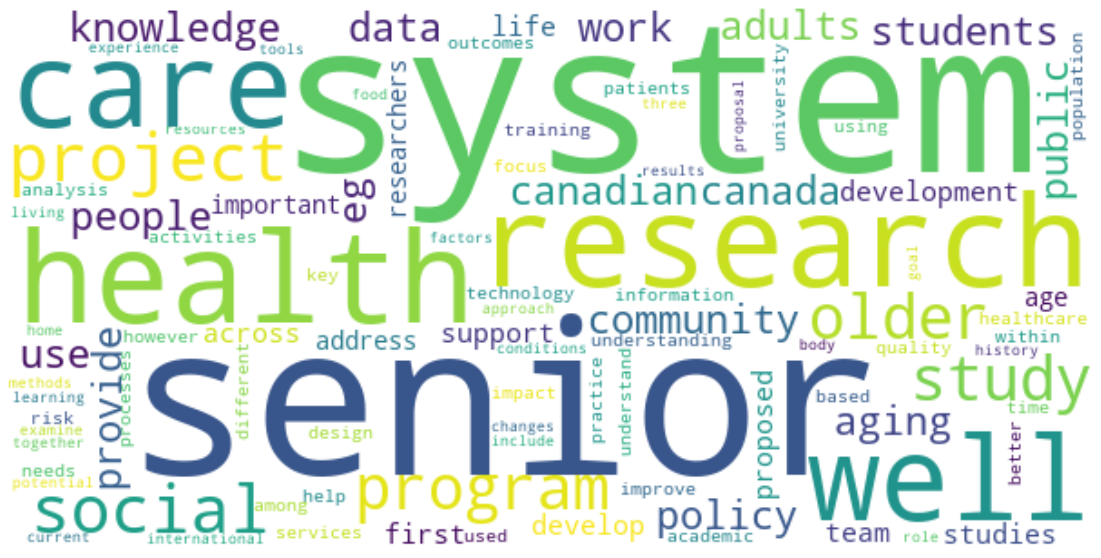

In [28]:
# create a wordcloud for words

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)


# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()


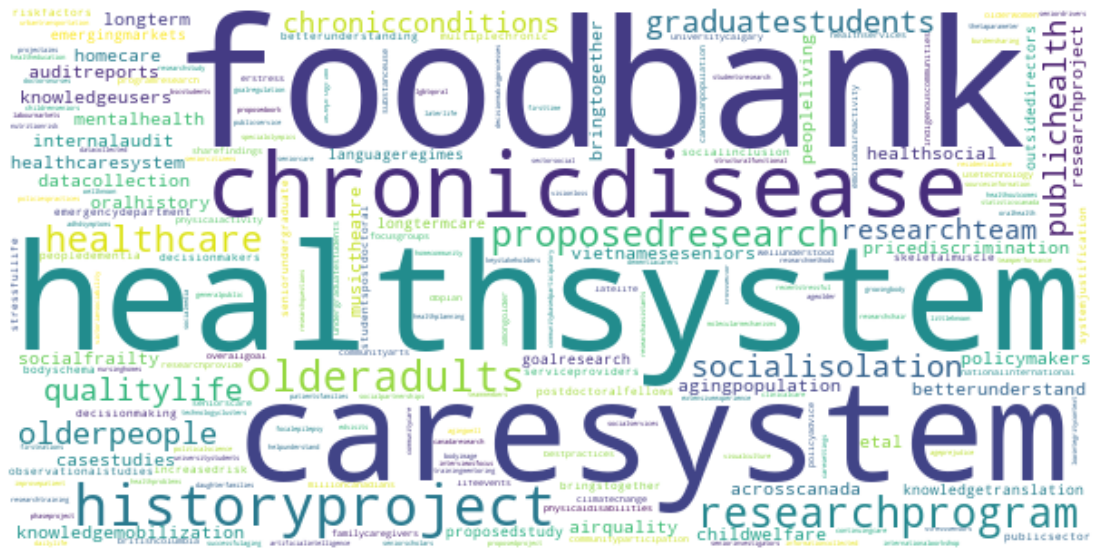

In [53]:
# create a wordcloud for bigrams

wc2 = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text2)


# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()


In [29]:
wc.to_file("worclcloud_cognit.png")